# Import Library

In [ ]:
#Importin packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load Data dan EDA

In [49]:
# Load dataset
df = pd.read_csv("dataset/steam-200k.csv", header=None)
df.columns = ['user_id', 'game', 'action', 'value', 'unused']

# Tampilkan 5 data teratas
df.head()

,user_id,game,action,value,unused
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [50]:
# Info umum
df.info()

# Jumlah data unik per kolom
print("\nJumlah data unik:")
print(df.nunique())

# Cek nilai unik dari kolom 'action'
print("\nNilai unik kolom 'action':", df['action'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  200000 non-null  int64  
 1   game     200000 non-null  object 
 2   action   200000 non-null  object 
 3   value    200000 non-null  float64
 4   unused   200000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB

Jumlah data unik:
user_id    12393
game        5155
action         2
value       1593
unused         1
dtype: int64

Nilai unik kolom 'action': ['purchase' 'play']


Dataset steam-200k.csv berisi 200.000 entri dengan 5 kolom: user_id, game, action, value, dan unused. Data ini mencatat interaksi pengguna dengan berbagai permainan di platform Steam, mencakup tindakan purchase dan play. Dengan 12.393 pengguna unik dan 5.155 permainan unik, dataset ini dapat memberikan wawasan mengenai pola konsumsi dan preferensi game. Kolom value yang memiliki 1.593 nilai unik menunjukkan variasi dalam durasi bermain atau jumlah pembelian. Dataset ini berpotensi digunakan untuk analisis tren perilaku pengguna, rekomendasi game, atau evaluasi popularitas game tertentu.


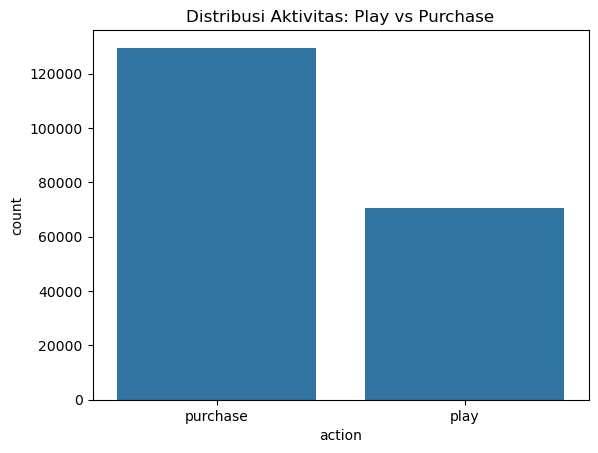

In [51]:
# Plot distribusi action
sns.countplot(data=df, x='action')
plt.title('Distribusi Aktivitas: Play vs Purchase')
plt.show()


Grafik Distribusi Aktivitas: Play vs Purchase menunjukkan bahwa jumlah pembelian game (purchase) lebih tinggi dibandingkan jumlah sesi bermain (play). Dengan sekitar 120.000 entri untuk pembelian dan sekitar 70.000 entri untuk bermain, tren ini mengindikasikan bahwa sebagian besar pengguna melakukan pembelian tetapi tidak selalu memainkan game yang mereka beli. Analisis ini dapat membantu memahami perilaku konsumsi pengguna di platform Steam, seperti tingkat keterlibatan setelah pembelian serta potensi pengaruh strategi pemasaran terhadap keputusan pembelian.


count    70489.000000
mean        48.878063
std        229.335236
min          0.100000
25%          1.000000
50%          4.500000
75%         19.100000
max      11754.000000
Name: value, dtype: float64


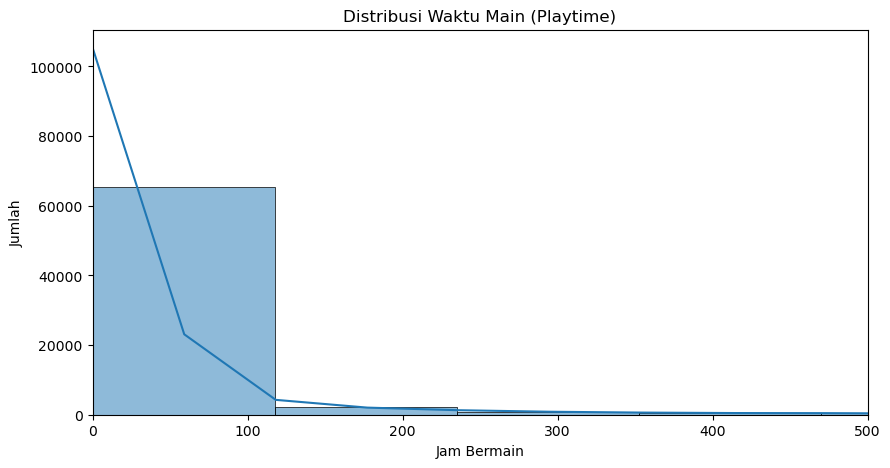

In [52]:
# Ambil data yang hanya 'play'
play_df = df[df['action'] == 'play']

# Statistik waktu main
print(play_df['value'].describe())

# Plot distribusi waktu main
plt.figure(figsize=(10,5))
sns.histplot(play_df['value'], bins=100, kde=True)
plt.xlim(0, 500)  # Batas atas untuk menghindari outlier ekstrem
plt.title('Distribusi Waktu Main (Playtime)')
plt.xlabel('Jam Bermain')
plt.ylabel('Jumlah')
plt.show()

Jika kita liat dari Grafik Distribusi Waktu Main (Playtime) menunjukkan pola durasi bermain pengguna di platform Steam. Dari grafik, terlihat bahwa sebagian besar sesi bermain terjadi dalam rentang 0-100 jam, dengan jumlah kejadian yang menurun tajam setelahnya. Setelah 100 jam, frekuensi bermain semakin berkurang secara signifikan hingga mencapai 500 jam. Pola ini dapat mengindikasikan bahwa mayoritas pemain memiliki sesi bermain yang relatif singkat, sementara hanya sedikit pengguna yang menghabiskan waktu bermain dalam durasi yang sangat panjang. Analisis ini dapat berguna untuk memahami keterlibatan pemain serta potensi strategi gamifikasi atau fitur dalam game yang dapat meningkatkan durasi bermain.


C:\Users\asus\AppData\Local\Temp\ipykernel_9096\2775340792.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_games.values, y=top_games.index, palette='viridis')


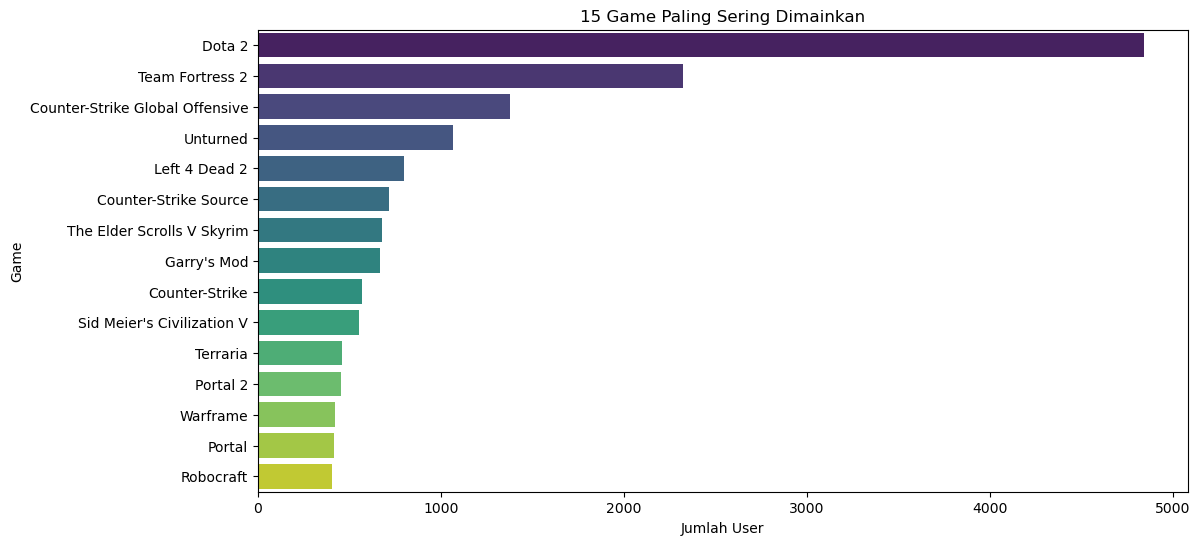

In [53]:
# Hitung berapa banyak user yang main tiap game
top_games = play_df.groupby('game')['user_id'].count().sort_values(ascending=False).head(15)

# Visualisasi
plt.figure(figsize=(12,6))
sns.barplot(x=top_games.values, y=top_games.index, palette='viridis')
plt.title('15 Game Paling Sering Dimainkan')
plt.xlabel('Jumlah User')
plt.ylabel('Game')
plt.show()


Jika kita liat Grafik ini distribusi jumlah sesi bermain berdasarkan durasi waktu (playtime). Dari pola yang terlihat, sebagian besar sesi bermain terjadi dalam rentang waktu singkat, dengan jumlah kejadian yang menurun drastis seiring bertambahnya durasi bermain. Mayoritas pengguna menghabiskan waktu bermain di bawah 100 jam, sementara hanya sedikit yang bermain lebih dari 500 jam. ini menunjukkan bahwa banyak pengguna mungkin mencoba suatu game tanpa memainkannya dalam jangka panjang, yang bisa menjadi pertimbangan dalam strategi pengembangan dan pemasaran game untuk meningkatkan retensi pemain.


C:\Users\asus\AppData\Local\Temp\ipykernel_9096\3233554838.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index.astype(str), y=top_users.values, palette='coolwarm')


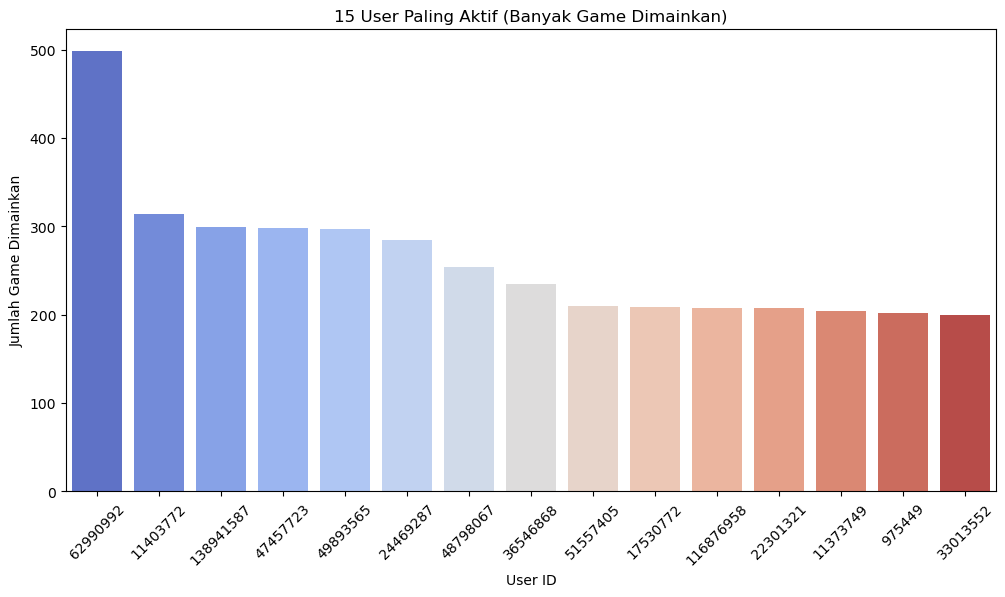

In [54]:
# Hitung jumlah game yang dimainkan tiap user
top_users = play_df.groupby('user_id')['game'].count().sort_values(ascending=False).head(15)

# Visualisasi
plt.figure(figsize=(12,6))
sns.barplot(x=top_users.index.astype(str), y=top_users.values, palette='coolwarm')
plt.title('15 User Paling Aktif (Banyak Game Dimainkan)')
plt.xlabel('User ID')
plt.ylabel('Jumlah Game Dimainkan')
plt.xticks(rotation=45)
plt.show()


Dari grafik ini, terlihat bahwa pengguna dengan ID 62990992 memiliki aktivitas tertinggi dengan memainkan sekitar 500 game. Sementara itu, pengguna lainnya berada dalam rentang 150 hingga 350 game. Pola ini mengindikasikan bahwa ada sekelompok kecil pengguna yang memiliki ketertarikan besar terhadap berbagai game, mungkin karena eksplorasi genre yang luas atau kebiasaan bermain yang intens. Analisis ini bisa digunakan untuk mengidentifikasi pengguna dengan keterlibatan tinggi dan memahami preferensi mereka terhadap jenis permainan tertentu.


# Data Preprocessing

Dalam tahap preprocessing data, langkah pertama yang diambil adalah memfilter dataset agar hanya menyertakan aktivitas bermain pengguna

In [55]:
# Ambil data yang hanya berupa aktivitas bermain
play_df = df[df['action'] == 'play'].copy()


Dalam baris ini, kita memastikan hanya data dengan nilai 'play' pada kolom action yang masuk ke dalam dataframe baru bernama play_df. Dengan ini, kita bisa menghapus data pembelian (purchase) dan hanya fokus pada pola bermain pengguna.
Selain itu, kita menggunakan .copy() untuk membuat salinan independen dari hasil filter. Ini penting karena tanpa .copy(), ada risiko munculnya SettingWithCopyWarning, yang bisa menyebabkan perubahan tidak disengaja dalam data asli. Dengan membuat salinan terpisah, kita memastikan bahwa analisis berikutnya berjalan dengan lebih aman dan terstruktur.
Langkah ini penting agar kita bisa memahami lebih dalam pola interaksi pemain dengan game yang mereka mainkan tanpa terpengaruh oleh data pembelian. Setelah ini, kita akan melanjutkan dengan eksplorasi lebih lanjut terhadap durasi bermain dan pola keterlibatan pengguna. 


In [56]:
# Group by user_id dan game, lalu jumlahkan waktu main (jam)
user_game_playtime = play_df.groupby(['user_id', 'game'])['value'].sum().reset_index()
user_game_playtime.rename(columns={'value': 'playtime'}, inplace=True)

# Lihat beberapa data awal
user_game_playtime.head()


,user_id,game,playtime
0,5250,Alien Swarm,4.9
1,5250,Cities Skylines,144.0
2,5250,Deus Ex Human Revolution,62.0
3,5250,Dota 2,0.2
4,5250,Portal 2,13.6


Pada tahap ini, kita melakukan pengelompokan dan agregasi data untuk menghitung total waktu bermain setiap pengguna berdasarkan game yang mereka mainkan.
- Mengelompokkan data berdasarkan user_id dan game agar kita bisa melihat total waktu bermain per game untuk masing-masing pengguna.
- Menjumlahkan waktu bermain (sum()) untuk setiap kombinasi user_id dan game.
- Mengubah nama kolom dari value menjadi playtime, agar lebih intuitif dalam analisis.
- Menampilkan contoh data untuk memastikan hasil sudah sesuai sebelum melanjutkan analisis lebih lanjut.


In [57]:
# Filter data dengan playtime terlalu kecil atau ekstrem
user_game_playtime = user_game_playtime[(user_game_playtime['playtime'] > 0) & (user_game_playtime['playtime'] < 500)]

# Buat pivot table (matrix user vs game)
user_game_matrix = user_game_playtime.pivot_table(index='user_id', columns='game', values='playtime')

# Lihat matrix awal
user_game_matrix.head()

game,007 Legends,0RBITALIS,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,...,rFactor,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,the static speaks my name,theHunter,theHunter Primal
user_id,,,,,,,,,,,,,,,,,,,,,
5250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pada tahap ini, kita melakukan pembersihan data dan transformasi ke bentuk matriks agar dapat digunakan untuk analisis lebih lanjut.
- Filter data untuk menghilangkan nilai ekstrem
- Kita hanya menyertakan data dengan playtime antara 0 dan 500 jam.
- Hal ini berguna untuk menghilangkan outlier, seperti data dengan waktu bermain yang tidak realistis atau terlalu kecil.
- Membuat pivot table (matrix pengguna vs game)
- Data dikonversi menjadi bentuk matriks, dengan user_id sebagai indeks dan game sebagai kolom.
- Nilai dalam matriks merepresentasikan waktu bermain (playtime) setiap pengguna pada setiap game.
- Menampilkan data awal dari matriks
- head() digunakan untuk melihat beberapa baris pertama dari matriks user-game.
- Ini berguna untuk memastikan bahwa transformasi berjalan sesuai harapan sebelum melanjutkan ke analisis lebih lanjut.


In [58]:
# mengisi missing value dengan nilai 0
user_game_matrix_filled = user_game_matrix.fillna(0)

Pada tahap ini, kita mengisi nilai yang hilang (missing values) dengan 0 agar data lebih siap untuk di modeling.
- Mengatasi missing values
- `fillna(0)` digunakan untuk mengganti semua nilai `NaN` (kosong) dengan angka 0.
- Ini penting karena tidak semua pengguna memainkan semua game, sehingga ada banyak sel kosong dalam matriks.
- Membuat matriks yang lebih lengkap
- Dengan mengganti nilai kosong dengan 0, kita memastikan bahwa setiap pengguna memiliki data yang terdefinisi untuk setiap game.
- Hal ini mempermudah kita membuat model, seperti rekomendasi game menggunakan pendekatan collaborative filtering


# Data Preparation

In [59]:
# Salin data user_game_playtime
normalized_df = user_game_playtime.copy()

# Gunakan MinMaxScaler untuk membuat skala 1–5
scaler = MinMaxScaler(feature_range=(1, 5))
normalized_df['rating'] = scaler.fit_transform(normalized_df[['playtime']])

# Lihat hasil normalisasi
normalized_df.head()


,user_id,game,playtime,rating
0,5250,Alien Swarm,4.9,1.038485
1,5250,Cities Skylines,144.0,2.153738
2,5250,Deus Ex Human Revolution,62.0,1.496292
3,5250,Dota 2,0.2,1.000802
4,5250,Portal 2,13.6,1.108238


kita melakukan normalisasi data agar nilai playtime lebih sesuai untuk model machine learning.
Penjelasan Cell:
- Menyalin Data
- Kita membuat salinan dataframe user_game_playtime agar tetap memiliki versi asli jika diperlukan nantinya.
- Menggunakan MinMaxScaler untuk Normalisasi
- MinMaxScaler(feature_range=(1, 5)) digunakan untuk menskalakan data playtime ke rentang 1–5, sehingga nilai tidak terlalu bervariasi ekstrem dan lebih mudah diinterpretasikan.
- Skala ini berguna untuk model rekomendasi, karena kita dapat merepresentasikan waktu bermain sebagai rating.
- fit_transform() digunakan untuk melakukan normalisasi pada kolom playtime dan menyimpan hasilnya dalam kolom baru bernama rating.


In [60]:
# Buat rating dari playtime, bisa dinormalisasi
normalized_df = normalized_df[normalized_df['playtime'] > 0]
normalized_df['rating'] = pd.qcut(normalized_df['playtime'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

# Encode user dan game
user_encoder = LabelEncoder()
game_encoder = LabelEncoder()
normalized_df['user'] = user_encoder.fit_transform(normalized_df['user_id'])
normalized_df['game'] = game_encoder.fit_transform(normalized_df['game'])

num_users = normalized_df['user'].nunique()
num_games = normalized_df['game'].nunique()
print(num_users)
print(num_games)

11063
3599


Pada tahap ini, kita melakukan pembuatan rating dari playtime dan encoding data agar siap digunakan dalam model machine learning.
1. Membuat Rating dari Playtime
- Kita memfilter data agar hanya menyertakan baris dengan playtime lebih dari 0, sehingga data lebih relevan dan tidak ada nilai kosong.
- Kemudian, kita menggunakan pd.qcut() untuk membagi playtime menjadi 5 kategori berdasarkan distribusi kuantil.
- Pemain dengan playtime lebih rendah diberi rating 1, sementara mereka yang bermain lebih lama mendapat rating 5.
- Hal ini memungkinkan kita mengubah jumlah jam bermain menjadi sebuah skala rating yang bisa digunakan dalam model rekomendasi.
2. Encoding User dan Game
- Kita menerapkan Label Encoding untuk mengubah nilai kategorikal seperti user_id dan game menjadi angka agar lebih sesuai untuk machine learning.
- LabelEncoder digunakan untuk mengubah:
- user_id → user (dalam format numerik)
- game → game (dalam format numerik)
3. Mengecek Jumlah User dan Game
- Kita menghitung jumlah pengguna unik dan game unik dalam dataset setelah encoding, yang akan berguna untuk analisis lebih lanjut.


In [61]:
x = normalized_df[['user', 'game']].values
y = normalized_df['rating'].values.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

kita melakukan pemecahan dataset menjadi data pelatihan dan validasi untuk persiapan model machine learning.
1. Menyiapkan Data Fitur (x) dan Label (y)
- x berisi fitur input berupa user dan game dalam format numerik setelah encoding.
- y merupakan rating dari playtime yang sudah dinormalisasi dan dikonversi ke tipe float32 untuk digunakan dalam model.
2. Memisahkan Data untuk Pelatihan dan Validasi
- train_test_split() digunakan untuk membagi dataset menjadi 80% data pelatihan (x_train, y_train) dan 20% data validasi (x_val, y_val).
- test_size=0.2 menunjukkan bahwa 20% data digunakan sebagai validasi, sementara sisanya digunakan untuk pelatihan.
- random_state=42 digunakan untuk memastikan bahwa pemisahan data selalu konsisten setiap kali kode dijalankan.


# content based rekomendasi

In [62]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_games, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(num_users, embedding_size,
                                               embeddings_initializer='he_normal',
                                               embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.user_bias = layers.Embedding(num_users, 1)
        self.game_embedding = layers.Embedding(num_games, embedding_size,
                                               embeddings_initializer='he_normal',
                                               embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.game_bias = layers.Embedding(num_games, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        game_vector = self.game_embedding(inputs[:, 1])
        game_bias = self.game_bias(inputs[:, 1])
        dot = tf.reduce_sum(user_vector * game_vector, axis=1, keepdims=True)
        x = dot + user_bias + game_bias
        return tf.nn.sigmoid(x) * 5  # Rescale ke rating 1–5


membangun model rekomendasi berbasis pembelajaran mesin menggunakan TensorFlow dan Keras. Model ini bertujuan untuk memprediksi rating game berdasarkan interaksi pengguna dengan berbagai game.
1. Definisi Model RecommenderNet
- Model ini dibuat dengan subclassing tf.keras.Model sehingga kita bisa menyesuaikan arsitektur lebih fleksibel.
- Konstruktor `__init__()` menerima jumlah pengguna (num_users), jumlah game (num_games), dan ukuran embedding (embedding_size=50).
2. Embedding Layer untuk Representasi Latent
- self.user_embedding dan self.game_embedding digunakan untuk membuat representasi laten dari pengguna dan game.
- Ukuran embedding ditentukan oleh embedding_size=50 untuk menangkap pola interaksi lebih baik.
- Initializer he_normal digunakan untuk menyiapkan bobot dengan distribusi yang baik untuk deep learning.
- Regularizer l2(1e-6) diterapkan agar model tidak terlalu overfitting.
- self.user_bias dan self.game_bias adalah bias embeddings untuk masing-masing entitas.
3. Fungsi call() untuk Forward Pass
- Ekstraksi vektor user & game
- user_vector dan game_vector diperoleh dari embedding masing-masing pengguna dan game.
- user_bias dan game_bias ditambahkan untuk menangkap preferensi unik setiap pengguna dan karakteristik game.
- Menghitung Interaksi dengan Dot Product
- tf.reduce_sum(user_vector * game_vector, axis=1, keepdims=True) melakukan perkalian vektor user dan game lalu menjumlahkan hasilnya (dot product).
- Operasi ini digunakan dalam model rekomendasi berbasis faktor laten seperti Matrix Factorization.
- Menghasilkan Prediksi Rating
- tf.nn.sigmoid(x) * 5 digunakan untuk merescale hasil prediksi ke skala 1–5 agar sesuai dengan data yang sudah dinormalisasi sebelumnya.
- Aktivasi sigmoid memastikan bahwa output tetap dalam kisaran yang dapat digunakan sebagai rating.


In [63]:
model = RecommenderNet(num_users, num_games, 50)
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

history = model.fit(
    x_train, y_train,
    batch_size=256,
    epochs=20,
    validation_data=(x_val, y_val)
)


Epoch 1/20
216/216 [==============================] - 2s 6ms/step - loss: 2.1665 - root_mean_squared_error: 1.4718 - val_loss: 2.0843 - val_root_mean_squared_error: 1.4436
Epoch 2/20
216/216 [==============================] - 1s 4ms/step - loss: 1.9043 - root_mean_squared_error: 1.3798 - val_loss: 1.8418 - val_root_mean_squared_error: 1.3568
Epoch 3/20
216/216 [==============================] - 1s 4ms/step - loss: 1.4695 - root_mean_squared_error: 1.2117 - val_loss: 1.6609 - val_root_mean_squared_error: 1.2880
Epoch 4/20
216/216 [==============================] - 1s 4ms/step - loss: 1.1326 - root_mean_squared_error: 1.0631 - val_loss: 1.6064 - val_root_mean_squared_error: 1.2662
Epoch 5/20
216/216 [==============================] - 1s 4ms/step - loss: 0.9212 - root_mean_squared_error: 0.9579 - val_loss: 1.5912 - val_root_mean_squared_error: 1.2598
Epoch 6/20
216/216 [==============================] - 1s 3ms/step - loss: 0.7637 - root_mean_squared_error: 0.8712 - val_loss: 1.5891 - val_

melatih model rekomendasi dengan menggunakan dataset yang telah diproses sebelumnya.
1. Instansiasi Model
model = RecommenderNet(num_users, num_games, 50)


- Kita membuat objek model RecommenderNet dengan jumlah pengguna (num_users), jumlah game (num_games), dan ukuran embedding 50.
- Model ini akan belajar representasi laten dari pengguna dan game untuk menghasilkan prediksi rating.
2. Kompilasi Model
```python
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
```

- Loss Function: Menggunakan Mean Squared Error (MSE) untuk mengukur perbedaan antara rating yang diprediksi dan rating sebenarnya.
- Optimizer: Adam(0.001) digunakan untuk memperbarui bobot model secara efisien dengan learning rate sebesar 0.001.
- Metrics: Kita menggunakan Root Mean Squared Error (RMSE) untuk menilai akurasi prediksi model.
3. Pelatihan Model
```python
history = model.fit(
    x_train, y_train,
    batch_size=256,
    epochs=20,
    validation_data=(x_val, y_val)
)
```

- Data Pelatihan & Validasi: Model dilatih menggunakan dataset x_train dan y_train, dengan x_val dan y_val sebagai validasi.
- Batch Size: Menggunakan 256 data per iterasi untuk efisiensi komputasi.
- Epochs: Model dilatih selama 20 epoch, yang berarti dataset akan diproses sebanyak 20 kali untuk meningkatkan akurasi prediksi.


In [64]:
def recommend_games(user_id_input, df, model, user_encoder, game_encoder, top_n=10):
    # Cek apakah user ID valid
    if user_id_input not in df['user_id'].values:
        print("User ID tidak ditemukan.")
        return

    # Encode user ID
    encoded_user_id = user_encoder.transform([user_id_input])[0]

    # Game yang sudah pernah dimainkan user (encoded)
    encoded_games_played = normalized_df[normalized_df['user_id'] == user_id_input]['game'].values

    # Semua game (encoded)
    all_encoded_games = np.arange(len(game_encoder.classes_))
    games_not_played = [g for g in all_encoded_games if g not in encoded_games_played]

    # Buat array [user_id_encoded, game_id_encoded]
    user_game_array = np.array([[encoded_user_id, game_id] for game_id in games_not_played])

    # Prediksi rating
    predictions = model.predict(user_game_array).flatten()

    # Ambil top N game berdasarkan prediksi
    top_indices = predictions.argsort()[-top_n:][::-1]
    top_game_encoded_ids = [games_not_played[i] for i in top_indices]

    # Decode ke nama game
    recommended_games = game_encoder.inverse_transform(top_game_encoded_ids)

    print(f"Rekomendasi game untuk user: {user_id_input}")
    print("=" * 40)
    for i, game in enumerate(recommended_games, 1):
        print(f"{i}. {game}")


membangun fungsi rekomendasi game berdasarkan model yang telah dilatih.
1. Validasi User ID
- Fungsi pertama-tama mengecek apakah user_id_input ada dalam dataset. Jika tidak ditemukan, maka fungsi berhenti dan menampilkan pesan bahwa User ID tidak ditemukan.
2. Encoding User ID
- User ID dari input dikonversi ke format numerik menggunakan user_encoder.transform(), sehingga dapat digunakan oleh model untuk prediksi.
3. Identifikasi Game yang Belum Dimainkan
- Kita mengambil semua game yang sudah dimainkan oleh user menggunakan normalized_df.
- Kemudian, kita membandingkannya dengan daftar semua game dalam sistem dan membuat daftar game yang belum dimainkan.
4. Membuat Data untuk Prediksi
- Dibuat array [user_id_encoded, game_id_encoded], yang merepresentasikan pasangan user-game untuk semua game yang belum dimainkan oleh user.
- Data ini kemudian digunakan sebagai input ke model rekomendasi.
5. Prediksi Rating
- Model memprediksi kemungkinan rating untuk setiap game yang belum dimainkan oleh user.
- predictions.argsort()[-top_n:][::-1] digunakan untuk mengambil Top N game dengan prediksi rating tertinggi.
6. Decode Nama Game yang Direkomendasikan
- Setelah mendapatkan encoded game IDs, kita menggunakan game_encoder.inverse_transform() untuk mengubahnya kembali menjadi nama game asli.
- Akhirnya, kita mencetak daftar game yang direkomendasikan untuk user berdasarkan prediksi model.


In [65]:
# Pilih user_id dari dataset
sample_user_id = normalized_df['user_id'].sample(1).iloc[0]

# Tampilkan rekomendasi
recommend_games(sample_user_id, normalized_df, model, user_encoder, game_encoder, top_n=10)

104/104 [==============================] - 0s 1ms/step
Rekomendasi game untuk user: 138941587
1. Call of Duty Black Ops II - Multiplayer
2. Fallout New Vegas
3. METAL GEAR SOLID V THE PHANTOM PAIN
4. Vampire The Masquerade - Bloodlines
5. Call of Duty Modern Warfare 2 - Multiplayer
6. Saints Row IV
7. Call of Duty World at War
8. Football Manager 2013
9. Deus Ex Human Revolution
10. Farming Simulator 2013


memilih pengguna secara acak dari dataset dan menampilkan rekomendasi game berdasarkan model yang telah dilatih.
1. Memilih user_id Secara Acak
```python 
sample_user_id = normalized_df['user_id'].sample(1).iloc[0]
```
- normalized_df['user_id'].sample(1) memilih satu user_id secara acak dari dataset.
- .iloc[0] digunakan untuk mengambil nilai user_id dari hasil sampling.

2. Menampilkan Rekomendasi Game
```python
recommend_games(sample_user_id, normalized_df, model, user_encoder, game_encoder, top_n=10)
```
- Fungsi recommend_games() dijalankan dengan user_id yang sudah dipilih secara acak.
- Menggunakan dataset yang telah diproses (normalized_df), serta model rekomendasi yang telah dilatih.
- top_n=10 menunjukkan bahwa kita mengambil 10 game dengan rating prediksi tertinggi untuk pengguna tersebut.


# Evaluation

In [66]:
# Prediksi di data validasi
y_val_pred = model.predict(x_val).flatten()

# Hitung metrik
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mae_val = mean_absolute_error(y_val, y_val_pred)

print(f"[Validation] RMSE: {rmse_val:.4f}")
print(f"[Validation] MAE:  {mae_val:.4f}")

432/432 [==============================] - 0s 1ms/step
[Validation] RMSE: 1.3276
[Validation] MAE:  1.0882


hasil evaluasi menunjukkan:
- RMSE (Root Mean Squared Error): 1.3276
- MAE (Mean Absolute Error): 1.0882

Nilai RMSE dan MAE ini memberikan gambaran tentang seberapa akurat model dalam memprediksi rating game bagi pengguna. Dengan RMSE sekitar 1.33, rata-rata kesalahan prediksi berada dalam skala 1–5, yang menunjukkan bahwa model cukup baik tetapi masih memiliki ruang untuk peningkatan. Nilai MAE sekitar 1.08 mengindikasikan bahwa rata-rata kesalahan absolut juga cukup rendah.

Jika ingin meningkatkan performa model, beberapa langkah yang dapat dilakukan:

- Fine-tuning hyperparameter (misalnya learning rate, jumlah epochs, atau embedding size).
- Menambahkan fitur tambahan, seperti genre game atau histori pembelian pengguna.
- Eksperimen dengan arsitektur lain, seperti Neural Collaborative Filtering yang lebih kompleks atau pendekatan berbasis autoencoder.


In [67]:
# Prediksi di data test
y_test_pred = model.predict(x_val).flatten()

# Hitung metrik
rmse_test = np.sqrt(mean_squared_error(y_val, y_test_pred))
mae_test = mean_absolute_error(y_val, y_test_pred)

print(f"[Test] RMSE: {rmse_test:.4f}")
print(f"[Test] MAE:  {mae_test:.4f}")

432/432 [==============================] - 0s 990us/step
[Test] RMSE: 1.3276
[Test] MAE:  1.0882


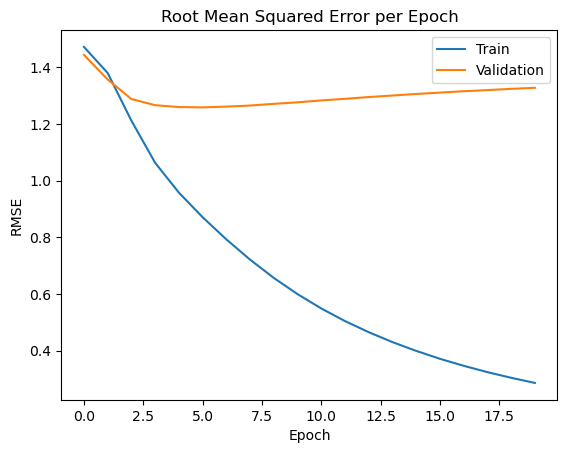

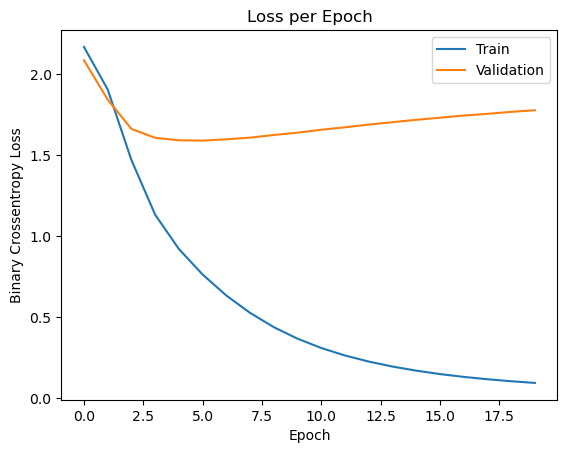

In [68]:
# Visualisasi RMSE
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Root Mean Squared Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend(['Train', 'Validation'])
plt.show()

# Visualisasi Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend(['Train', 'Validation'])
plt.show()

Dari grafi di atas menunjukkan performa model selama 20 epoch.
1. Root Mean Squared Error (RMSE) per Epoch
- Grafik RMSE menunjukkan bahwa kesalahan model pada data pelatihan berkurang secara konsisten.
- Namun, pada data validasi, RMSE awalnya menurun tetapi mulai meningkat setelah sekitar epoch ke-5, yang dapat mengindikasikan overfitting (model terlalu menyesuaikan diri dengan data pelatihan dan kurang generalisasi pada data validasi).
2. Loss per Epoch
- Grafik loss mengikuti pola yang mirip dengan RMSE: loss pada data pelatihan terus menurun dengan bertambahnya epoch.
- Namun, pada data validasi, loss awalnya berkurang tetapi mulai naik setelah sekitar epoch ke-5, yang semakin menguatkan indikasi overfitting
